<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Numeros_Errores/Actividad03_Convergencia_Truncamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [2]:
def aprox_seno(x, tol, max_iter):

  list_aprox = []
  sen=0
  termino_ant=0

  for n in range(0, max_iter):

    termino = (-1)**n * x**(2*n+1) / mt.factorial(2*n + 1)
    sen += termino
    list_aprox.append(sen)

    if abs(termino - termino_ant) < tol:
      break
    
    termino_ant = termino

  return sen , n , list_aprox

Arpoximacion de sen(pi/4)=0.7071067811865679

Error relativo=2.888970123978146e-14 y error porcentual=2.888970123978146e-12



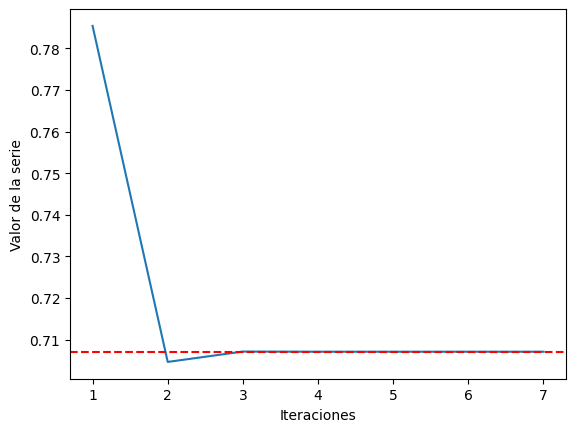

In [3]:
pi = mt.pi
sen , n , list_aprox = aprox_seno(pi/4 , 1e-8 , 1000)
sen_real = mt.sin(pi/4)

error_relativo = abs((sen-sen_real)/sen_real)
error_porcentual = error_relativo * 100

print(f'Arpoximacion de sen(pi/4)={sen}')
print()
print(f'Error relativo={error_relativo} y error porcentual={error_porcentual}')
print()

# Grafica 

iter = list(range(1, len(list_aprox)+1))
plt.plot(iter, list_aprox, label='Aproximación')
plt.axhline(y=sen_real, color='r', linestyle='--', label='Valor real')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la serie')
plt.show()

In [4]:
def aprox_ln(x, tol, max_iter):

  list_aprox = []
  ln=0
  termino_ant=0

  for n in range(0, max_iter):

    termino = (-1)**(n-1) * x**n / n
    ln += termino
    list_aprox.append(ln)

    if abs(termino - termino_ant) < tol:
      break
    
    termino_ant = termino

  return ln , n , list_aprox

Arpoximacion de ln(x+1)=-0.5440211108972587 , para x=9

Error relativo=1.2362653665015564 y error porcentual=123.62653665015564



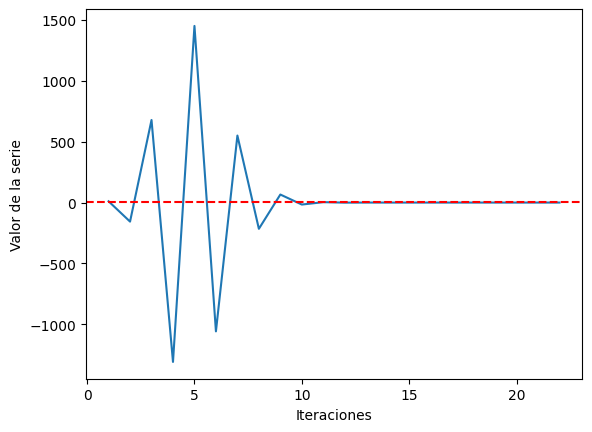

In [5]:
x = 9
ln , n , list_aprox = aprox_seno(1+x , 1e-8 , 1000)
ln_real = mt.log(1+x)

error_relativo = abs((ln - ln_real) / ln_real)
error_porcentual = error_relativo * 100

print(f'Arpoximacion de ln(x+1)={ln} , para x={x}')
print()
print(f'Error relativo={error_relativo} y error porcentual={error_porcentual}')
print()

# Grafica 

iter = list(range(1, len(list_aprox)+1))
plt.plot(iter, list_aprox , label='Aproximación')
plt.axhline(y=ln_real, color='r', linestyle='--', label='Valor real')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la serie')
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [6]:
def coeficiente_binomial(alpha, n):
    coeficeinte = 1
    for i in range(n):
        coeficeinte *= (alpha - i)
    return coeficeinte / mt.factorial(n)





def serie_binomial(x , alpha , tol , max_iter):

  suma = 0
  termino_ant = 0
  list_aprox = []

  for n in range(max_iter):

    termino = coeficiente_binomial(alpha , n) * x**n
    suma += termino
    list_aprox.append(suma)

    if abs(termino - termino_ant) < tol:
      break
    
    termino_ant = termino

  return suma , n , list_aprox

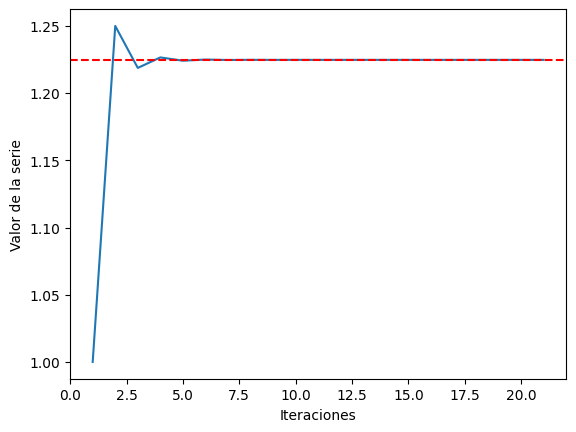

In [7]:
x = 0.5
serie , n , list_aprox = serie_binomial(0.5 , 0.5 , 1e-8 , 1000)
valor_real = mt.sqrt(x+1)

error_relativo = abs((serie - valor_real) / valor_real)
error_porcentual = error_relativo * 100

# Grafica 

iter = list(range(1, len(list_aprox)+1))
plt.plot(iter, list_aprox , label='Aproximación')
plt.axhline(y=valor_real, color='r', linestyle='--', label='Valor real')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la serie')
plt.show()